# Visualizations
## Histograms
There are several questions in test exams regarding histograms and, the ones I have seen, are all around the paramters you can provide (data, title, legends...)

We will be defining a simple circuit and see which are the options available for an histogram (and which not).

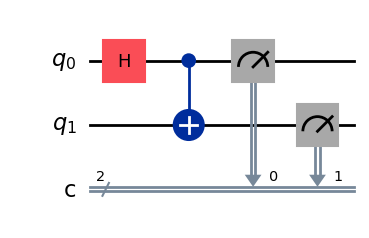

In [3]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2,2)
qc.h(0)
qc.cx(0,1)
qc.measure([0,1],[0,1])
qc.draw('mpl')

Now we simulate the circuit. Remember that you need measures in order to be able to retrieve counts.

In [54]:
from qiskit_aer import Aer

backend = Aer.get_backend('qasm_simulator')
job = backend.run(qc,shots=4096)
results = job.result()

And this is the histogram we get. We might specify a legend and a title. And a figsize, color. But not a name!

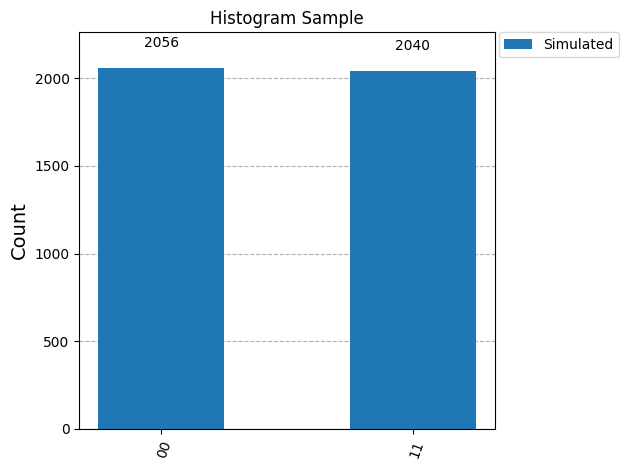

In [55]:
from qiskit.visualization import plot_histogram

plot_histogram(results.get_counts(),title='Histogram Sample',legend=['Simulated'])

We are going to execute the same circuit but on real hardware. First we look for a real QPU.    

In [29]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService()
backend2 = service.least_busy(simulator=False,operational=True)
print(backend2)

<IBMBackend('ibm_brisbane')>


Then we transpile our circuit so that it can be executed on our QPU using a PassManager.

In [33]:
from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2

pm = generate_preset_pass_manager(backend=backend2,optimization_level=0)
qct = pm.run(qc)

sampler = SamplerV2(backend2)
job2 = sampler.run([qct])
results2 = job2.result()


In [34]:
# print(results2)

PrimitiveResult([SamplerPubResult(data=DataBin(c=BitArray(<shape=(), num_shots=4096, num_bits=2>)), metadata={'circuit_metadata': {}})], metadata={'execution': {'execution_spans': ExecutionSpans([DoubleSliceSpan(<start='2025-09-16 11:34:30', stop='2025-09-16 11:34:32', size=4096>)])}, 'version': 2})


In [35]:
# import pickle

# with open('basic2.pkl','wb') as f:
#     pickle.dump(result2,f)

Now we will show a comparison of the results between simultated and real hardware. So we may add multiple datasets and labels. 

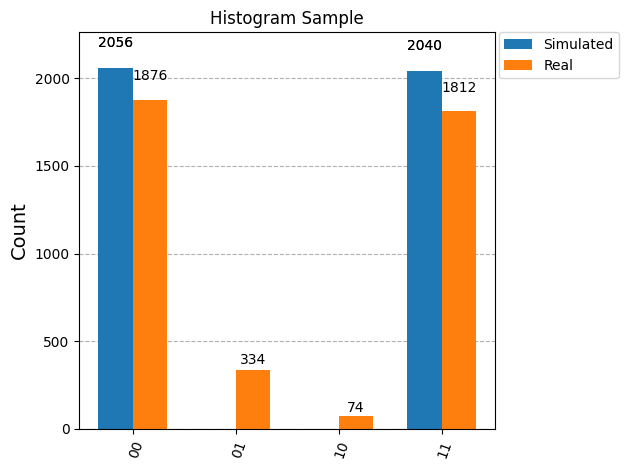

In [56]:
from qiskit.visualization import plot_histogram

plot_histogram([results.get_counts(),results2[0].data.c.get_counts()],title='Histogram Sample',legend=['Simulated','Real'])